<a href="https://colab.research.google.com/github/AlyW8/Data-Science-Exercises/blob/main/AlysWangU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U2proj.

Ex1.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU2proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 2 Project: Flipping Metaphorical Coins

**Task**:

Two parts:

1. Propose a data set that's compatible with a pymc betabinomial model. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a betabinomial model using pymc within the colab environment, on a data set of your choice.

Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Anything that can be looked at as either being yes or no, success or faliure, can be modeled with the betabinomial model. Examples: BAP3 introduces the betabinomial model with coin flipping, and Richard McElreath starts with guessing the proportion of surface water covering a planet in his book Statistical Rethinking.

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

-  Use your best idea now; you could use the same context the whole course and learn everything you need to know. Its more than ok to use the same context, or even some of the same data, from unit to unit.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit2NotesAK *is* your example! You are expected to be somewhere between a half and a quarter as detailed--but more is always welcome.

# Background
The New York Times Best Sellers list is a widely regarded list of best selling books, published weekly since 1931. Some of the books named by list are standalone books, with no other books in a series or companion series, and others are part of a published series. This study attempts to uncover the true proportion of fictional books named by the New York Times Best Sellers list that are part of a series versus standalone novels.



























# Prior
My assumption is that 20% of the number of fictional books named in the NYT Best Sellers list will be part of a series and 80% will be standalone novels.

<Axes: >

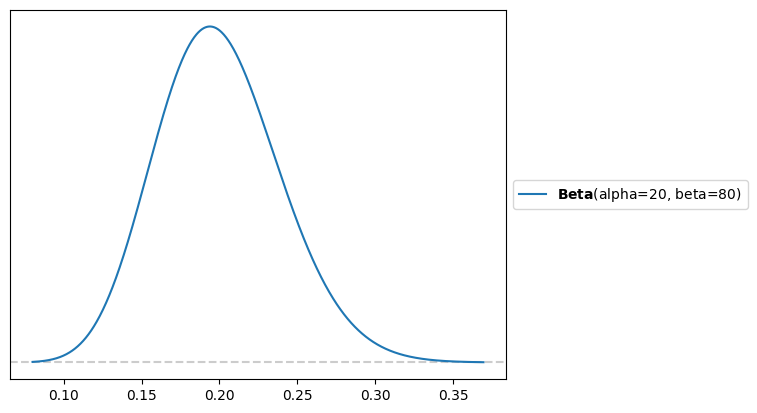

In [5]:
!pip install preliz
import preliz as pz

pz.Beta(alpha=20,beta=80).plot_pdf()

# Data
I looked at the list of New York Times Best Sellers books via Wikipedia in 6 randomly chosen years: 1940, 1950, 1978, 1984, 1998, and 2024. The titles, along with their status as series or standalone novels, are compiled in the spreadsheet below:

https://docs.google.com/spreadsheets/d/1jKwA2QZv5XGG2_N8KSMISP32ta_ghkH5c6-vT1K7BVk/edit?gid=0#gid=0

With 77 total novels, 38 are part of a series and 39 re standalone.

In [6]:
!pip install arviz
!pip install pymc
import numpy as np
import arviz as az
import pymc as pm




In [7]:
#create
series = np.repeat(1,38)
standalone = np.repeat (0,39)
NYTbestseller = np.concatenate((series,standalone))
NYTbestseller


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
with pm.Model() as NYTbestseller_guess:
  #prior
  θ = pm.Beta('θ' , alpha = 20. , beta = 80.)

  #likelihood
  y = pm.Bernoulli('y', p = θ, observed = NYTbestseller)

 #get sample
  idata_NYTbestseller = pm.sample()


<Axes: title={'center': 'θ'}>

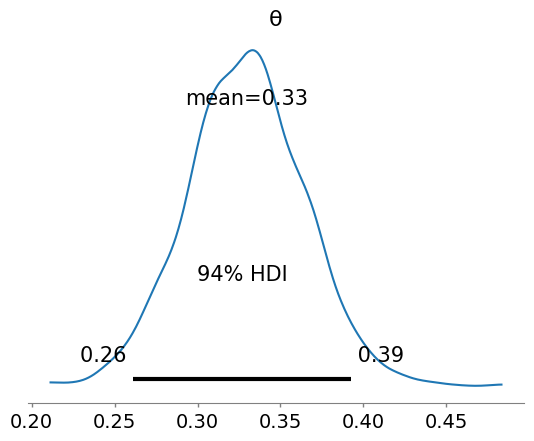

In [9]:
   #graph
  az.plot_posterior(idata_NYTbestseller)

# Conclusion

The posterior graph shows that there's a 94% chance of the true proportion of books in a series is between .26 and .39. As my prior, .2, is outside of this range, my assumption is likely incorrect.